# Objective
To test different algorithms for edge segmentation, watermark removal using `opencv`

# Setup
## Load Libraries

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import warnings

parent_dir = os.path.dirname(os.path.abspath(os.path.curdir))
sys.path.append(parent_dir)
warnings.catch_warnings()
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
import cv2
import matplotlib.pyplot as plt

from art.utils import display_image
from art.boundary import BoundaryImage

In [102]:
pln = 8
tp = "PL"  # PL
path = os.path.join(parent_dir, "tests", "test_data", f"Persian large {pln}.jpg")
# path = os.path.join(parent_dir, "tests", "test_data", f"border {pln}.jpg")
im1 = cv2.imread(path)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)
nm = f"{tp}{pln}"


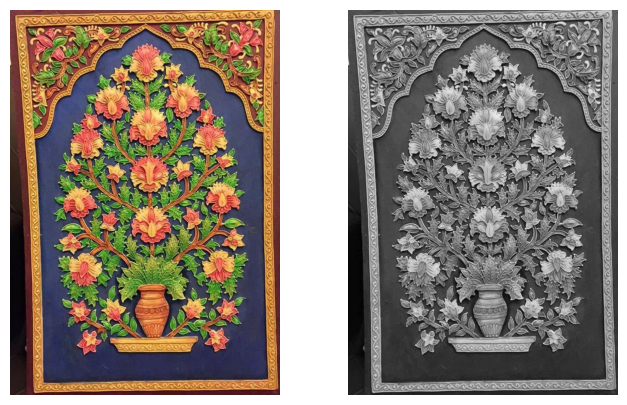

In [109]:
im_handler = BoundaryImage(im1, verbose=True)
_, (ax0, ax1) = plt.subplots(ncols=2, figsize=(8, 5))
display_image(im_handler.rgb_image, ax=ax0)
display_image(im_handler.gray_image, cmap=True, ax=ax1)
plt.show()

# Testing edge segmentation

## Default binarization

BoundaryImage :: INFO :: Completed Otsu thresholding with n_classes = 2


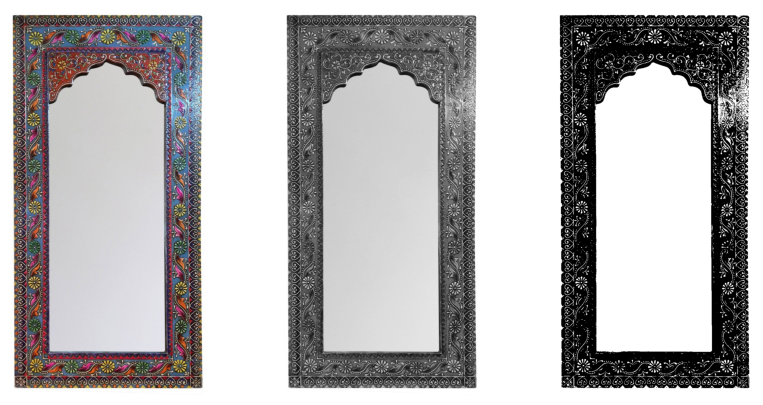

BoundaryImage :: INFO :: Dropping putative background region for boundary calculations
BoundaryImage :: INFO :: Starting boundary process for all 1 regions
BoundaryImage :: INFO :: Starting boundary calculation for region 1 out of 1
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 4.6 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 1 in 5 seconds
BoundaryImage :: INFO :: Completed all boundary generation in 0.17 minutes


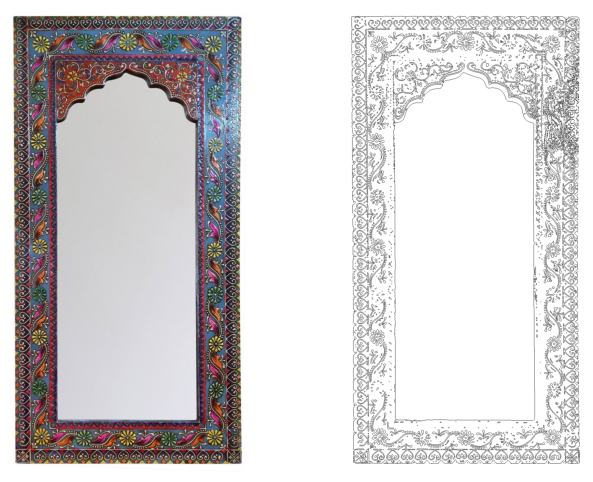

In [12]:
im_handler.threshold(2)
plt.show()

boundary_image, fig = im_handler.generate_boundary_image()
fig.savefig(
    os.path.join(parent_dir, "tests", "test_results", f"{nm}_boundary_binary.png"),
    bbox_inches="tight", pad_inches=0, transparent=False, dpi=200)
plt.show()

## Multithresholding

BoundaryImage :: INFO :: Completed Otsu thresholding with n_classes = 4


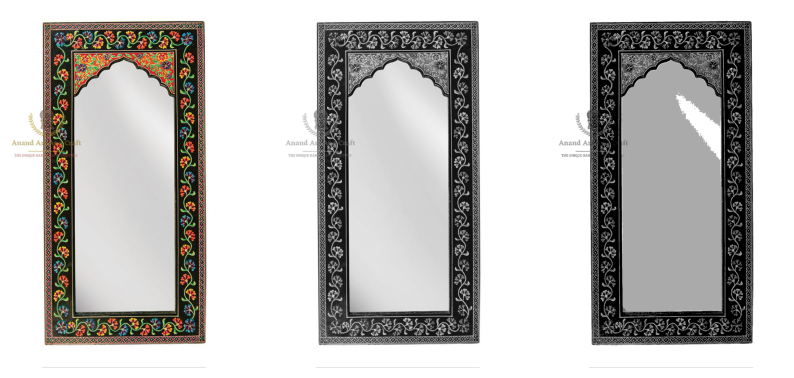

BoundaryImage :: INFO :: Dropping putative background region for boundary calculations
BoundaryImage :: INFO :: Starting boundary process for all 3 regions
BoundaryImage :: INFO :: Starting boundary calculation for region 1 out of 3
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 7.2 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 1 in 8 seconds
BoundaryImage :: INFO :: Starting boundary calculation for region 2 out of 3
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 27.2 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 2 in 27 seconds
BoundaryImage :: INFO :: Starting boundary calculation for region 3 out of 3
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 16.1 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 3 in 16 seconds
BoundaryImage :: INFO :: Completed all boundary generation in 0.92 minutes


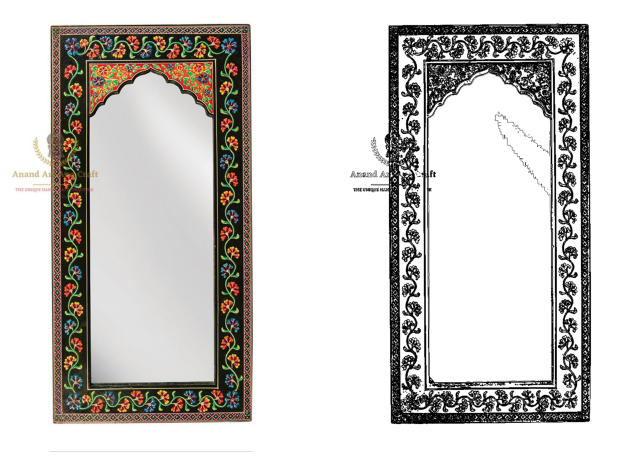

In [57]:
n_classes = 4
im_handler.threshold(n_classes)
plt.show()

boundary_image, fig = im_handler.generate_boundary_image()
fig.savefig(
    os.path.join(parent_dir, "tests", "test_results", f"{nm}_boundary_multiclass_{n_classes}.png"),
    bbox_inches="tight", pad_inches=0, transparent=False, dpi=200)
plt.show()

In [50]:
import numpy as np
from skimage.transform import resize

width, height = 18, 24
conv_shape = (width * 96, height * 96)
im_shape = boundary_image.shape

print(
    f"Target shape (assuming 96 ppi): {tuple(np.flip(conv_shape))}; actual: {im_shape}"
    f"\nComparing scale factor: {width / height:.2f} vs {im_shape[0] / im_shape[1]:.2f}")

Target shape (assuming 96 ppi): (2304, 1728); actual: (807, 564)
Comparing scale factor: 0.75 vs 1.43


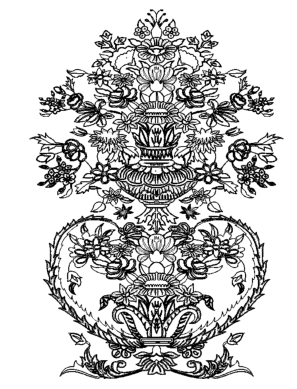

In [51]:
resized_bim = resize(boundary_image, np.flip(conv_shape), anti_aliasing=False)
display_image(~resized_bim, "gray")

In [52]:
print(f"Target shape: {tuple(np.flip(conv_shape))}; resized: {resized_bim.shape}")

Target shape: (2304, 1728); resized: (2304, 1728)


In [41]:
from skimage.morphology import area_closing
plt.imsave(
    os.path.join(parent_dir, "tests", "test_results", f"{nm}_boundary_multiclass_{n_classes}__resized.png"),
    area_closing(~resized_bim, connectivity=2), cmap="gray", dpi=96)

# Run all test images
Run through all test images prior to setting up the GUI

In [5]:
save_loc = os.path.join(parent_dir, "tests", "test_results")
width, height = 18, 24
conv_shape = (width * 96, height * 96)
conv_scfac = width / height

## Border images

In [6]:
border_images = [f"border {k}" for k in range(3, 6)] + ["Persian large 6"]
print(border_images)
border_out_head = "border"

['border 3', 'border 4', 'border 5', 'Persian large 6']


BoundaryImage :: INFO :: Generated exposure-corrected image using sigmoid based correction
BoundaryImage :: INFO :: Completed Otsu thresholding with n_classes = 2
BoundaryImage :: INFO :: Dropping putative background region for boundary calculations
BoundaryImage :: INFO :: Starting boundary process for all 1 regions
BoundaryImage :: INFO :: Starting boundary calculation for region 1 out of 1
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 10.8 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 1 in 11 seconds
BoundaryImage :: INFO :: Completed all boundary generation in 0.26 minutes
BoundaryImage :: INFO :: Resize to (1728, 2304) (scaling factor = 0.75); current image is (1156, 736) (scaling factor = 1.57)
BoundaryImage :: INFO :: NOTE: flipping target shape (swap width and height) due to scaling mismatch; new target shape: (2304, 1728) (scaling factor = 1.33)
BoundaryImage :: INFO :: Resized image from (1156, 736) to (2304, 1728), le

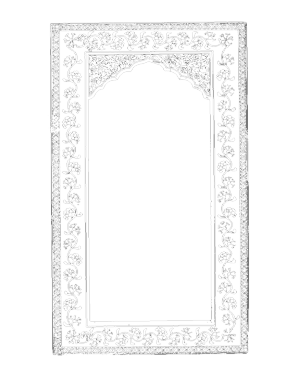

BoundaryImage :: INFO :: Generated exposure-corrected image using sigmoid based correction
BoundaryImage :: INFO :: Completed Otsu thresholding with n_classes = 2
BoundaryImage :: INFO :: Dropping putative background region for boundary calculations
BoundaryImage :: INFO :: Starting boundary process for all 1 regions
BoundaryImage :: INFO :: Starting boundary calculation for region 1 out of 1
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 6.0 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 1 in 6 seconds
BoundaryImage :: INFO :: Completed all boundary generation in 0.21 minutes
BoundaryImage :: INFO :: Resize to (1728, 2304) (scaling factor = 0.75); current image is (1446, 736) (scaling factor = 1.96)
BoundaryImage :: INFO :: NOTE: flipping target shape (swap width and height) due to scaling mismatch; new target shape: (2304, 1728) (scaling factor = 1.33)
BoundaryImage :: INFO :: Resized image from (1446, 736) to (2304, 1728), lead

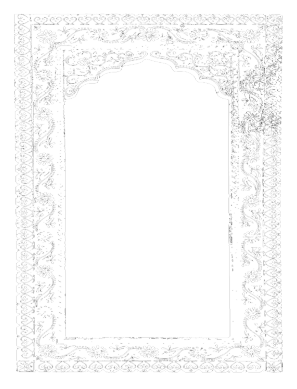

BoundaryImage :: INFO :: Generated exposure-corrected image using sigmoid based correction
BoundaryImage :: INFO :: Completed Otsu thresholding with n_classes = 2
BoundaryImage :: INFO :: Dropping putative background region for boundary calculations
BoundaryImage :: INFO :: Starting boundary process for all 1 regions
BoundaryImage :: INFO :: Starting boundary calculation for region 1 out of 1
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 15.4 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 1 in 16 seconds
BoundaryImage :: INFO :: Completed all boundary generation in 0.31 minutes
BoundaryImage :: INFO :: Resize to (1728, 2304) (scaling factor = 0.75); current image is (648, 563) (scaling factor = 1.15)
BoundaryImage :: INFO :: NOTE: flipping target shape (swap width and height) due to scaling mismatch; new target shape: (2304, 1728) (scaling factor = 1.33)
BoundaryImage :: INFO :: Resized image from (648, 563) to (2304, 1728), lead

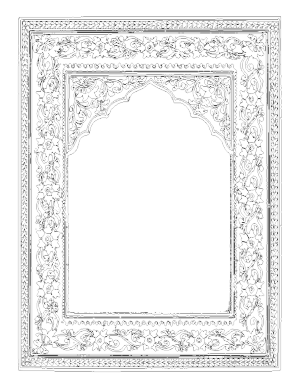

BoundaryImage :: INFO :: Generated exposure-corrected image using sigmoid based correction
BoundaryImage :: INFO :: Completed Otsu thresholding with n_classes = 2
BoundaryImage :: INFO :: Dropping putative background region for boundary calculations
BoundaryImage :: INFO :: Starting boundary process for all 1 regions
BoundaryImage :: INFO :: Starting boundary calculation for region 1 out of 1
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 22.1 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 1 in 22 seconds
BoundaryImage :: INFO :: Completed all boundary generation in 0.41 minutes
BoundaryImage :: INFO :: Resize to (1728, 2304) (scaling factor = 0.75); current image is (719, 465) (scaling factor = 1.55)
BoundaryImage :: INFO :: NOTE: flipping target shape (swap width and height) due to scaling mismatch; new target shape: (2304, 1728) (scaling factor = 1.33)
BoundaryImage :: INFO :: Resized image from (719, 465) to (2304, 1728), lead

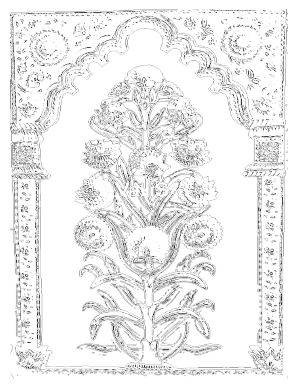

In [14]:
n_classes = 2
for k, border_name in enumerate(border_images):
    im = plt.imread(os.path.join(parent_dir, "tests", "test_data", f"{border_name}.jpg"))
    im_handler = BoundaryImage(im, photo_correction=True, verbose=False)
    resized_bim = im_handler.run_pipeline(
        n_classes=n_classes,
        resize_shape=conv_shape,
        invert_colors=True,
        transparent_background=True)
    display_image(resized_bim, cmap="gray")
    plt.show()
    plt.imsave(
        os.path.join(save_loc, f"{border_out_head}{k + 1}_boundary_mclass_{n_classes}__resized.pdf"),
        resized_bim, dpi=200, cmap="gray")


## Actuals

In [211]:
actual_images = [f"Persian large {k}" for k in range(1, 5)]
print(actual_images)
actual_out_head = "Persian"

['Persian large 1', 'Persian large 2', 'Persian large 3', 'Persian large 4']


BoundaryImage :: INFO :: Completed Otsu thresholding with n_classes = 3
BoundaryImage :: INFO :: Dropping putative background region for boundary calculations
BoundaryImage :: INFO :: Starting boundary process for all 2 regions
BoundaryImage :: INFO :: Starting boundary calculation for region 1 out of 2
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 1.5 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 1 in 2 seconds
BoundaryImage :: INFO :: Starting boundary calculation for region 2 out of 2
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 1.7 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 2 in 2 seconds
BoundaryImage :: INFO :: Completed all boundary generation in 0.07 minutes
BoundaryImage :: INFO :: Resize to (1728, 2304) (scaling factor = 0.75); current image is (620, 371) (scaling factor = 1.67)
BoundaryImage :: INFO :: NOTE: flipping target shape (swap width and height) due

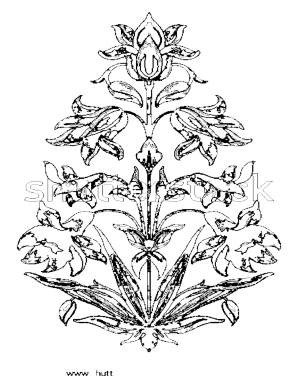

BoundaryImage :: INFO :: Completed Otsu thresholding with n_classes = 3
BoundaryImage :: INFO :: Dropping putative background region for boundary calculations
BoundaryImage :: INFO :: Starting boundary process for all 2 regions
BoundaryImage :: INFO :: Starting boundary calculation for region 1 out of 2
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 1.9 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 1 in 2 seconds
BoundaryImage :: INFO :: Starting boundary calculation for region 2 out of 2
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 2.1 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 2 in 2 seconds
BoundaryImage :: INFO :: Completed all boundary generation in 0.09 minutes
BoundaryImage :: INFO :: Resize to (1728, 2304) (scaling factor = 0.75); current image is (620, 366) (scaling factor = 1.69)
BoundaryImage :: INFO :: NOTE: flipping target shape (swap width and height) due

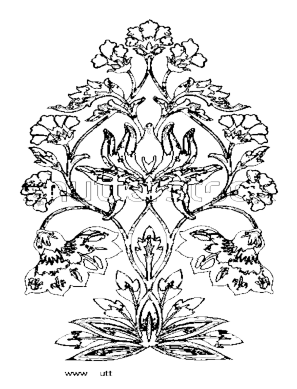

BoundaryImage :: INFO :: Completed Otsu thresholding with n_classes = 4
BoundaryImage :: INFO :: Dropping putative background region for boundary calculations
BoundaryImage :: INFO :: Starting boundary process for all 3 regions
BoundaryImage :: INFO :: Starting boundary calculation for region 1 out of 3
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 5.4 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 1 in 5 seconds
BoundaryImage :: INFO :: Starting boundary calculation for region 2 out of 3
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 8.9 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 2 in 9 seconds
BoundaryImage :: INFO :: Starting boundary calculation for region 3 out of 3
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 6.0 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 3 in 6 seconds
BoundaryImage :: INFO :: Completed

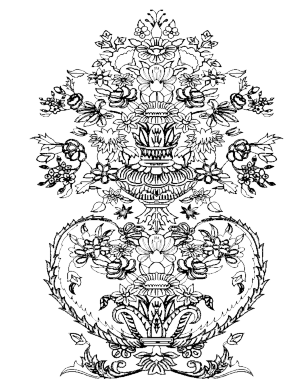

BoundaryImage :: INFO :: Completed Otsu thresholding with n_classes = 4
BoundaryImage :: INFO :: Dropping putative background region for boundary calculations
BoundaryImage :: INFO :: Starting boundary process for all 3 regions
BoundaryImage :: INFO :: Starting boundary calculation for region 1 out of 3
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 37.9 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 1 in 38 seconds
BoundaryImage :: INFO :: Starting boundary calculation for region 2 out of 3
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 7.7 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 2 in 8 seconds
BoundaryImage :: INFO :: Starting boundary calculation for region 3 out of 3
BoundaryImage :: INFO :: Completed Local peak mapping on distance image in 3.3 seconds
BoundaryImage :: INFO :: Completed boundary calculation for region 3 in 3 seconds
BoundaryImage :: INFO :: Complet

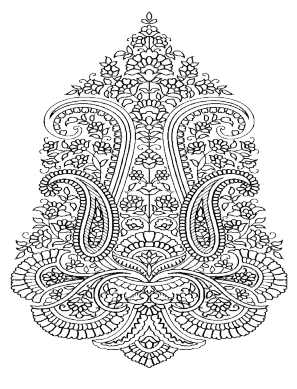

In [212]:
for k, actual_name in enumerate(actual_images):
    n_classes = 4
    if k < 2:
        n_classes = 3
    im = plt.imread(os.path.join(parent_dir, "tests", "test_data", f"{actual_name}.jpg"))
    im_handler = BoundaryImage(im, photo_correction=False, verbose=False)
    resized_bim = im_handler.run_pipeline(
        n_classes=n_classes,
        apply_post_filter=True,
        resize_shape=conv_shape,
        invert_colors=True,
        transparent_background=True)
    display_image(resized_bim, cmap="gray")
    plt.imsave(
        os.path.join(save_loc, f"{actual_out_head}{k + 1}_boundary_mclass_{n_classes}__resized.pdf"),
        resized_bim, dpi=200, cmap="gray")


In [15]:
import matplotlib
matplotlib.use('WRONG_ARG')

ValueError: 'wrong_arg' is not a valid value for backend; supported values are ['GTK3Agg', 'GTK3Cairo', 'GTK4Agg', 'GTK4Cairo', 'MacOSX', 'nbAgg', 'QtAgg', 'QtCairo', 'Qt5Agg', 'Qt5Cairo', 'TkAgg', 'TkCairo', 'WebAgg', 'WX', 'WXAgg', 'WXCairo', 'agg', 'cairo', 'pdf', 'pgf', 'ps', 'svg', 'template']